# Sentiment Analysis


### Importing packages and loading data

In [1]:
import pandas as pd
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVR
from lightgbm import LGBMRegressor

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SANG\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SANG\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Data Loading

In [2]:
Amazon_Consumer_Reviews1=pd.read_csv('Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv')
Amazon_Consumer_Reviews2= pd.read_csv('Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv')
Amazon_data= pd.read_csv('1429_1.csv')

C:\Users\SANG\AppData\Local\Temp\ipykernel_12072\747423571.py:3: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  Amazon_data= pd.read_csv('1429_1.csv')


In [3]:
Amazon_Consumer_Reviews1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   5000 non-null   object 
 1   dateAdded            5000 non-null   object 
 2   dateUpdated          5000 non-null   object 
 3   name                 5000 non-null   object 
 4   asins                5000 non-null   object 
 5   brand                5000 non-null   object 
 6   categories           5000 non-null   object 
 7   primaryCategories    5000 non-null   object 
 8   imageURLs            5000 non-null   object 
 9   keys                 5000 non-null   object 
 10  manufacturer         5000 non-null   object 
 11  manufacturerNumber   5000 non-null   object 
 12  reviews.date         5000 non-null   object 
 13  reviews.dateAdded    1052 non-null   object 
 14  reviews.dateSeen     5000 non-null   object 
 15  reviews.doRecommend  5000 non-null   b

In [4]:
Amazon_Consumer_Reviews2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28332 entries, 0 to 28331
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   28332 non-null  object 
 1   dateAdded            28332 non-null  object 
 2   dateUpdated          28332 non-null  object 
 3   name                 28332 non-null  object 
 4   asins                28332 non-null  object 
 5   brand                28332 non-null  object 
 6   categories           28332 non-null  object 
 7   primaryCategories    28332 non-null  object 
 8   imageURLs            28332 non-null  object 
 9   keys                 28332 non-null  object 
 10  manufacturer         28332 non-null  object 
 11  manufacturerNumber   28332 non-null  object 
 12  reviews.date         28332 non-null  object 
 13  reviews.dateSeen     28332 non-null  object 
 14  reviews.didPurchase  9 non-null      object 
 15  reviews.doRecommend  16086 non-null 

In [5]:
Amazon_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  reviews.sourceURLs 

In [6]:
# Retain the relevant columns for sentiment analysis
Amazon_Consumer_Reviews1 = Amazon_Consumer_Reviews1[['reviews.text', 'reviews.rating']]
Amazon_Consumer_Reviews2 = Amazon_Consumer_Reviews2[['reviews.text', 'reviews.rating']]
Amazon_data = Amazon_data[['reviews.text', 'reviews.rating']]

In [7]:
# Combine the dataframes into one
combined_data = pd.concat([Amazon_Consumer_Reviews1, Amazon_Consumer_Reviews2, Amazon_data], ignore_index=True)

# Check the info of the combined dataframe
print(combined_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67992 entries, 0 to 67991
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviews.text    67991 non-null  object 
 1   reviews.rating  67959 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.0+ MB
None


### Data Preprocessing

In [8]:
# Function for data preprocessing
def preprocess_data(df):
    df.dropna(subset=['reviews.text', 'reviews.rating'], inplace=True)
    df['reviews.text'] = df['reviews.text'].apply(lambda x: x.lower())
    stop_words = set(stopwords.words('english'))
    df['reviews.text'] = df['reviews.text'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word.isalnum() and word not in stop_words]))
    stemmer = PorterStemmer()
    df['reviews.text'] = df['reviews.text'].apply(lambda x: ' '.join([stemmer.stem(word) for word in word_tokenize(x)]))
    return df

# Preprocess the data
combined_data = preprocess_data(combined_data)

In [9]:
combined_data

,reviews.text,reviews.rating
0,thought would big small paper turn like palm t...,3.0
1,kindl light easi use especi beach,5.0
2,didnt know much use kindl went lower end im ha...,4.0
3,100 happi purchas caught sale realli good pric...,5.0
4,solid entri level kindl great kid gift kid fri...,5.0
...,...,...
67987,appreci faster higher amp charger use kindl ki...,3.0
67988,amazon includ charger kindl fact charg us extr...,1.0
67989,love kindl fire realli disappoint kindl power ...,1.0
67990,surpris find come type charg cord purchas one ...,1.0


### Exploratory Data Analysis (EDA)

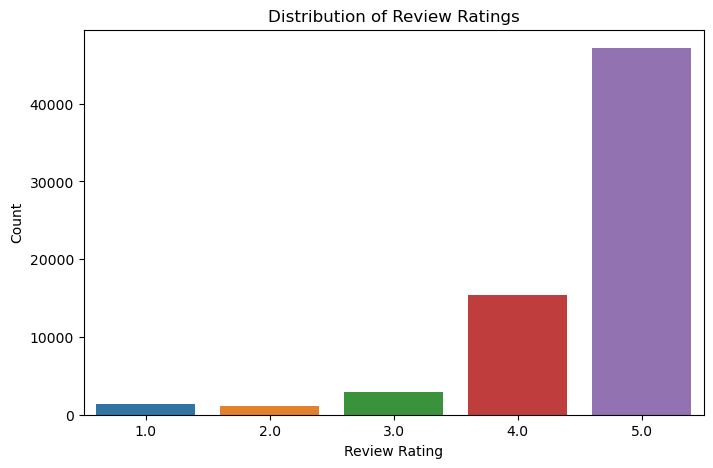

In [10]:
# Function for EDA
def perform_eda(df):
    plt.figure(figsize=(8, 5))
    sns.countplot(x='reviews.rating', data=df)
    plt.title('Distribution of Review Ratings')
    plt.xlabel('Review Rating')
    plt.ylabel('Count')
    plt.show()
    
# Perform EDA
perform_eda(combined_data)

### Feature Engineering and Selection

In [11]:
# Split data into features and target
X = combined_data['reviews.text']
y = combined_data['reviews.rating']

In [12]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train).toarray()
X_test_tfidf = tfidf_vectorizer.transform(X_test).toarray()

In [14]:
# Standardize the TF-IDF features
scaler = StandardScaler()
X_train_tfidf_scaled = scaler.fit_transform(X_train_tfidf)
X_test_tfidf_scaled = scaler.transform(X_test_tfidf)

### Models

In [15]:
def train_and_evaluate_model(X_train, X_test, y_train, y_test, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return model, mse, r2

In [16]:
# Train and evaluate the Linear Regression model
linear_regression_model, mse_reg, r2_reg = train_and_evaluate_model(X_train_tfidf_scaled, X_test_tfidf_scaled, y_train, y_test, LinearRegression())
print(f"Linear Regression Mean Squared Error: {mse_reg}")
print(f"Linear Regression R-squared: {r2_reg}")

Linear Regression Mean Squared Error: 8.068420579966495e+25
Linear Regression R-squared: -1.2206417600618311e+26


In [20]:
linear_regression_model, mse_lgbm, r2_lgbm = train_and_evaluate_model(X_train_tfidf_scaled, X_test_tfidf_scaled, y_train, y_test, LGBMRegressor(force_row_wise= True))
print(f"LightGBM Mean Squared Error: {mse_lgbm}")
print(f"LightGBM R-squared: {r2_lgbm}")

[LightGBM] [Info] Total Bins 128733
[LightGBM] [Info] Number of data points in the train set: 54366, number of used features: 2002
[LightGBM] [Info] Start training from score 4.554961
LightGBM Mean Squared Error: 0.4082236619560984
LightGBM R-squared: 0.3824133926951945
